In [ ]:
# The libridate library in R is made to work with date and time data simpler and faster. # Load necessary library

In [1]:
# Load necessary library
library(lubridate)

# Read in the dataset
orders <- read.csv("/anvil/projects/tdm/data/restaurant/orders.csv")

# Convert created_at column to Date
orders$created_at <- as.Date(orders$created_at)

# Create numeric and labeled day-of-week columns
orders$num_day_of_the_week <- wday(orders$created_at)
orders$day_of_the_week <- wday(orders$created_at, label = TRUE)

# Show frequency tables
table(orders$num_day_of_the_week)
table(orders$day_of_the_week)

# Cross-table to compare numeric and labeled values
table(orders$num_day_of_the_week, orders$day_of_the_week)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union





    1     2     3     4     5     6     7 
18651 19676 22003 20619 22210 15906 16238 


  Sun   Mon   Tue   Wed   Thu   Fri   Sat 
18651 19676 22003 20619 22210 15906 16238 

   
      Sun   Mon   Tue   Wed   Thu   Fri   Sat
  1 18651     0     0     0     0     0     0
  2     0 19676     0     0     0     0     0
  3     0     0 22003     0     0     0     0
  4     0     0     0 20619     0     0     0
  5     0     0     0     0 22210     0     0
  6     0     0     0     0     0 15906     0
  7     0     0     0     0     0     0 16238

In [ ]:
# Date only data is sotred as class Date. Basically the number of days since january 1,1970.

In [2]:
library(lubridate)

# Month as labeled factor
orders$month <- month(orders$created_at, label = TRUE, abbr = TRUE)

# Year column
orders$year <- year(orders$created_at)

# Check distribution
table(orders$month)
table(orders$year)


  Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec 
17825 23683     0     0     1 10120 10175  8933  6609 19893 18249 19815 


 2019  2020 
93795 41508 

In [3]:
# Total items per month
total_items_month <- tapply(orders$item_count, orders$month, sum, na.rm = TRUE)

# Inspect results
total_items_month

Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec 
40410 51197    NA    NA     0 27839 27296 23853 16098 31527 43102 47479

In [4]:
# Check orders for March
orders[orders$month == "Mar", ]

# Similarly for April and May
orders[orders$month == "Apr", ]
orders[orders$month == "May", ]

Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,⋯,delivery_date,vendor_id,created_at,LOCATION_NUMBER,LOCATION_TYPE,CID.X.LOC_NUM.X.VENDOR,num_day_of_the_week,day_of_the_week,month,year
<dbl>,<chr>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<chr>,<int>,<date>,<int>,<chr>,<chr>,<dbl>,<ord>,<ord>,<dbl>


Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,⋯,delivery_date,vendor_id,created_at,LOCATION_NUMBER,LOCATION_TYPE,CID.X.LOC_NUM.X.VENDOR,num_day_of_the_week,day_of_the_week,month,year
<dbl>,<chr>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<chr>,<int>,<date>,<int>,<chr>,<chr>,<dbl>,<ord>,<ord>,<dbl>


,akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,⋯,delivery_date,vendor_id,created_at,LOCATION_NUMBER,LOCATION_TYPE,CID.X.LOC_NUM.X.VENDOR,num_day_of_the_week,day_of_the_week,month,year
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<chr>,<int>,<date>,<int>,<chr>,<chr>,<dbl>,<ord>,<ord>,<dbl>
43725,11785,M210KRM,NA,15.5,1,,0,NA,Yes,Yes,⋯,,43,2019-05-10,0,,M210KRM X 0 X 43,6,Fri,May,2019


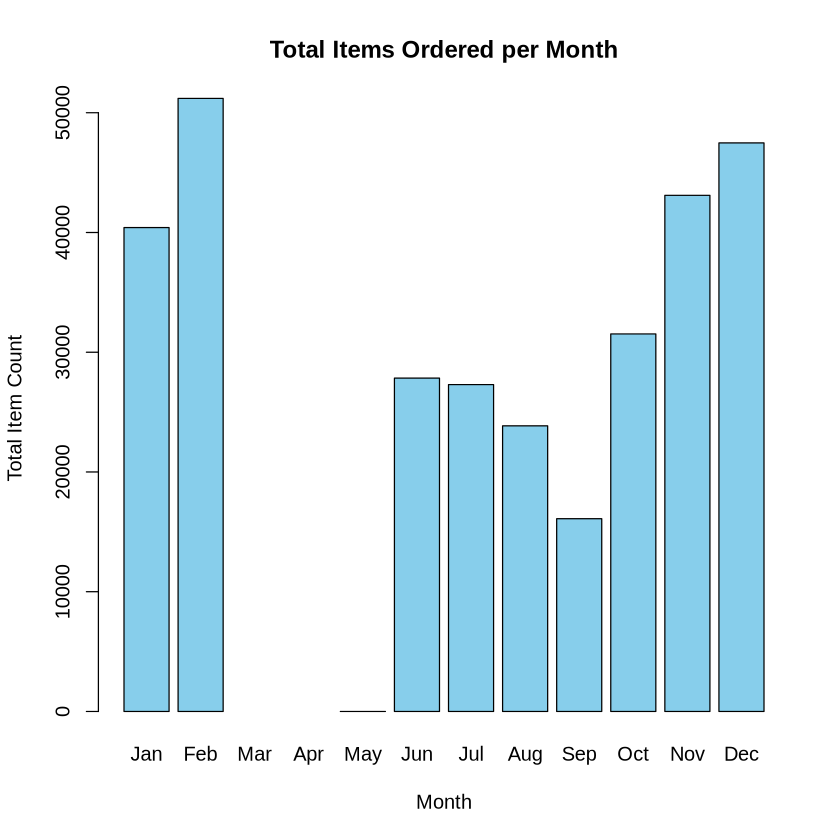

In [5]:
# Create barplot
barplot(total_items_month,
        col = "skyblue",
        main = "Total Items Ordered per Month",
        ylab = "Total Item Count",
        xlab = "Month")

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2019,NA,NA,NA,NA,0,27839,27296,23853,16098,31527,43102,47479
2020,40410,51197,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


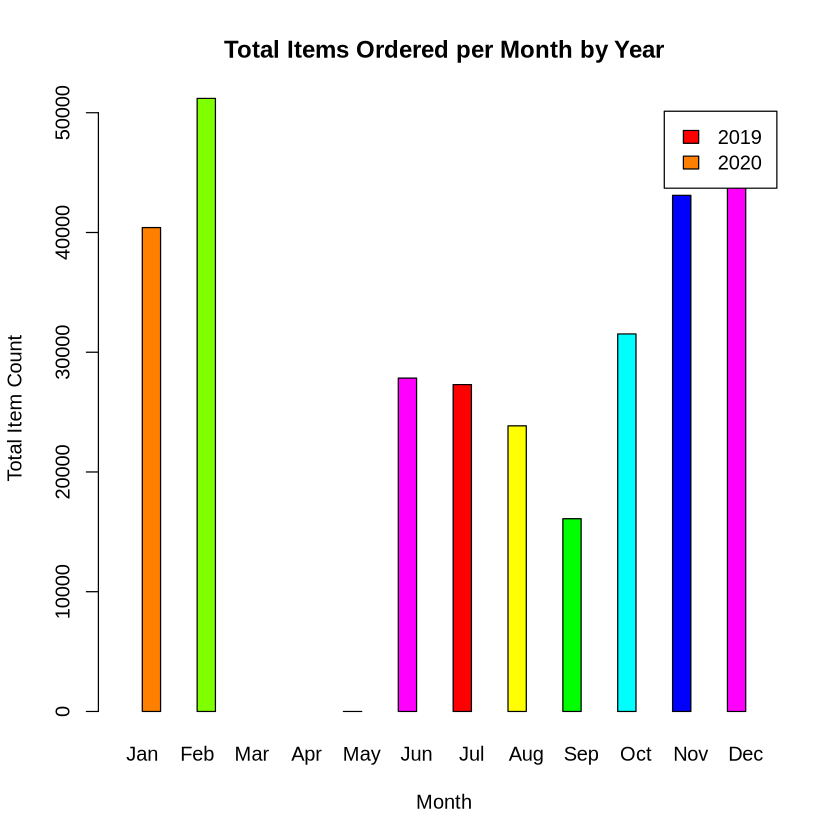

In [6]:
# Using tapply for year-month combination
total_items_year_month <- tapply(orders$item_count, list(orders$year, orders$month), sum, na.rm = TRUE)

# Inspect table
total_items_year_month

# Barplot
barplot(total_items_year_month,
        beside = TRUE,
        legend = TRUE,
        col = rainbow(ncol(total_items_year_month)),
        main = "Total Items Ordered per Month by Year",
        ylab = "Total Item Count",
        xlab = "Month")

In [7]:
flights <- read.csv("/anvil/projects/tdm/data/flights/subset/1997.csv")

In [8]:
library(lubridate)

flights$full_dates <- ymd(paste(flights$Year, flights$Month, flights$DayofMonth, sep = "-"))

In [9]:
flights$DepTime[flights$DepTime == 2400] <- 0

In [10]:
# Hour
flights$depHour <- floor(flights$DepTime / 100)

# Minute
flights$depMinute <- flights$DepTime %% 100  # fractional part as minutes

In [11]:
flights$date_times <- make_datetime(
  year = flights$Year,
  month = flights$Month,
  day = flights$DayofMonth,
  hour = flights$depHour,
  min = flights$depMinute
)

In [12]:
# Boston flights
bostonDF <- subset(flights, Origin == "BOS")

# Phoenix flights
phoenixDF <- subset(flights, Origin == "PHX")

# Chicago flights (Midway)
chicagoDF <- subset(flights, Origin == "MDW")

# Seattle flights
seattleDF <- subset(flights, Origin == "SEA")

In [13]:
# Boston
boston_distance <- tapply(bostonDF$Distance, bostonDF$Month, mean, na.rm = TRUE)

# Phoenix
phoenix_distance <- tapply(phoenixDF$Distance, phoenixDF$Month, mean, na.rm = TRUE)

# Chicago
chicago_distance <- tapply(chicagoDF$Distance, chicagoDF$Month, mean, na.rm = TRUE)

# Seattle
seattle_distance <- tapply(seattleDF$Distance, seattleDF$Month, mean, na.rm = TRUE)

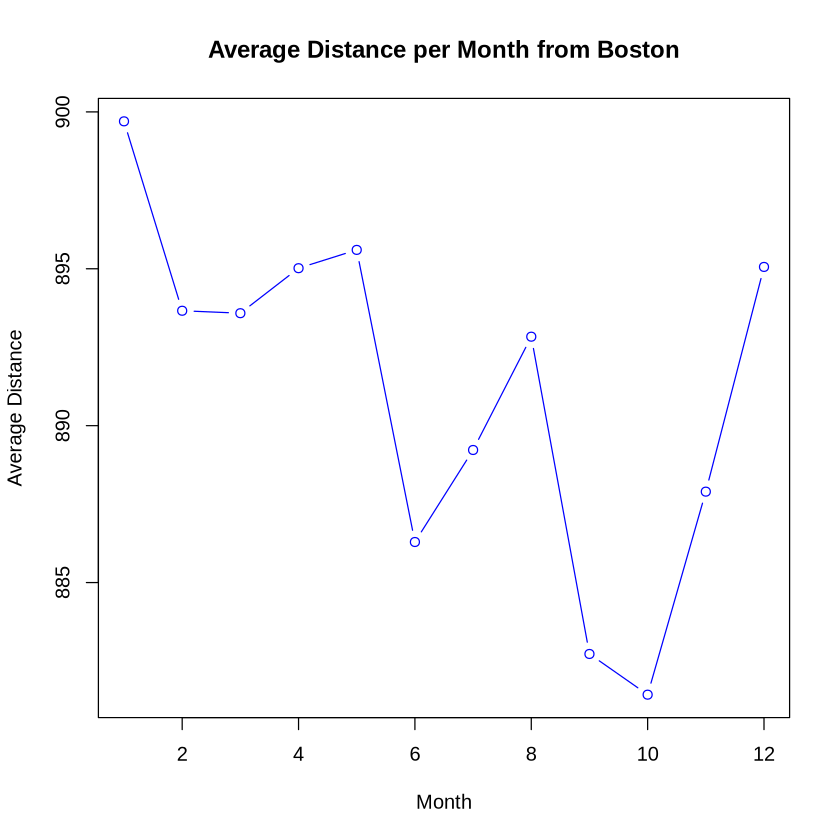

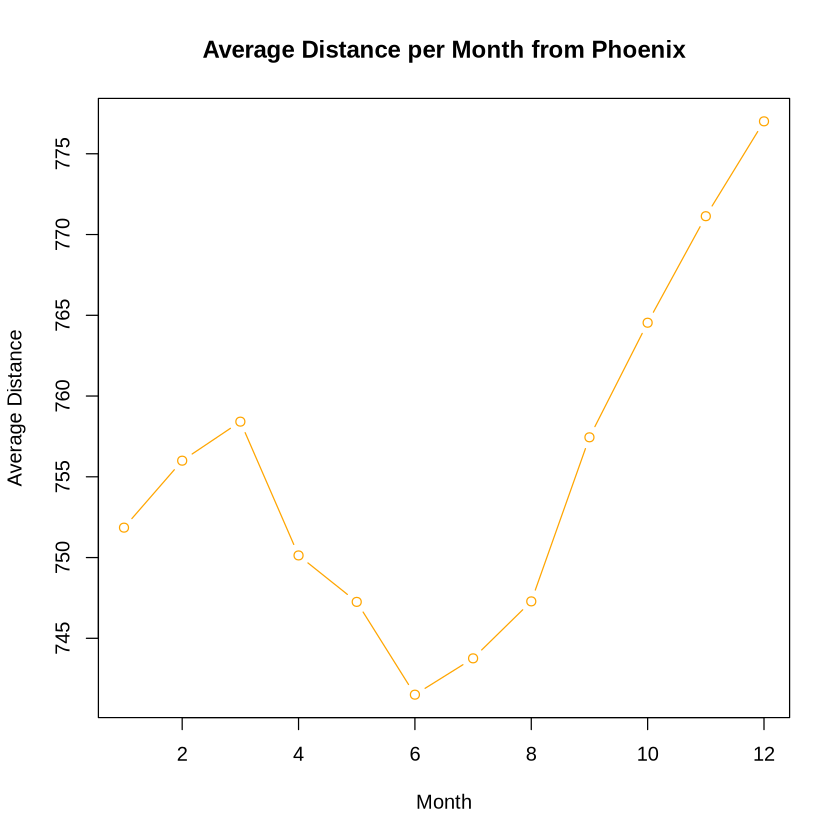

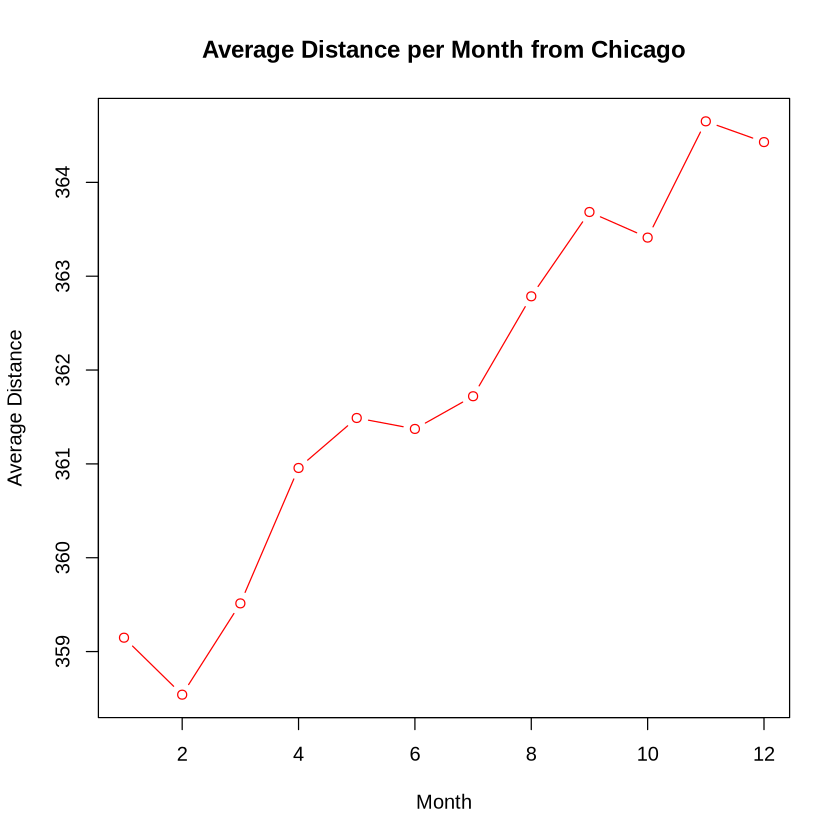

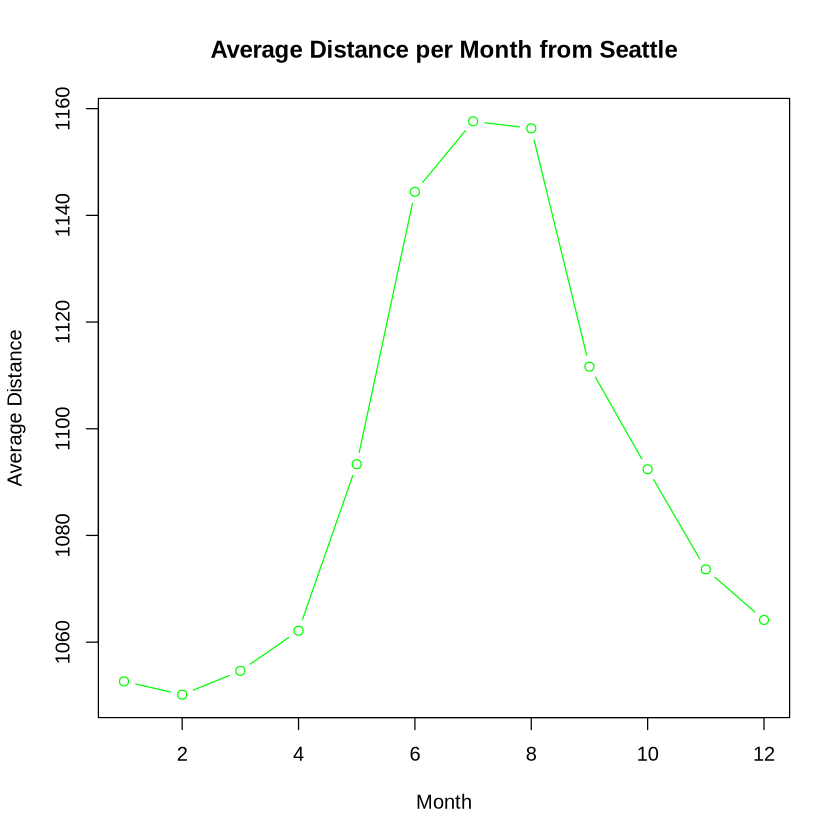

In [14]:
# Boston
plot(boston_distance,
     type = 'b',
     col = 'blue',
     main = 'Average Distance per Month from Boston',
     xlab = 'Month',
     ylab = 'Average Distance')

# Phoenix
plot(phoenix_distance,
     type = 'b',
     col = 'orange',
     main = 'Average Distance per Month from Phoenix',
     xlab = 'Month',
     ylab = 'Average Distance')

# Chicago
plot(chicago_distance,
     type = 'b',
     col = 'red',
     main = 'Average Distance per Month from Chicago',
     xlab = 'Month',
     ylab = 'Average Distance')

# Seattle
plot(seattle_distance,
     type = 'b',
     col = 'green',
     main = 'Average Distance per Month from Seattle',
     xlab = 'Month',
     ylab = 'Average Distance')